In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import string, nltk
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

C:\Users\udays\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
[nltk_data] Error loading wordnet: <urlopen error [WinError 10051] A
[nltk_data]     socket operation was attempted to an unreachable
[nltk_data]     network>


False

In [2]:
nltk.download('omw-1.4')

[nltk_data] Error loading omw-1.4: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [3]:
df = pd.read_csv(r'C:\fake reviews dataset.csv')
df.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...


In [4]:
df.isnull().sum()

category    0
rating      0
label       0
text_       0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  40432 non-null  object 
 1   rating    40432 non-null  float64
 2   label     40432 non-null  object 
 3   text_     40432 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.2+ MB


In [6]:
df.describe()

,rating
count,40432.000000
mean,4.256579
std,1.144354
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [7]:
df['rating'].value_counts()

5.0    24559
4.0     7965
3.0     3786
1.0     2155
2.0     1967
Name: rating, dtype: int64

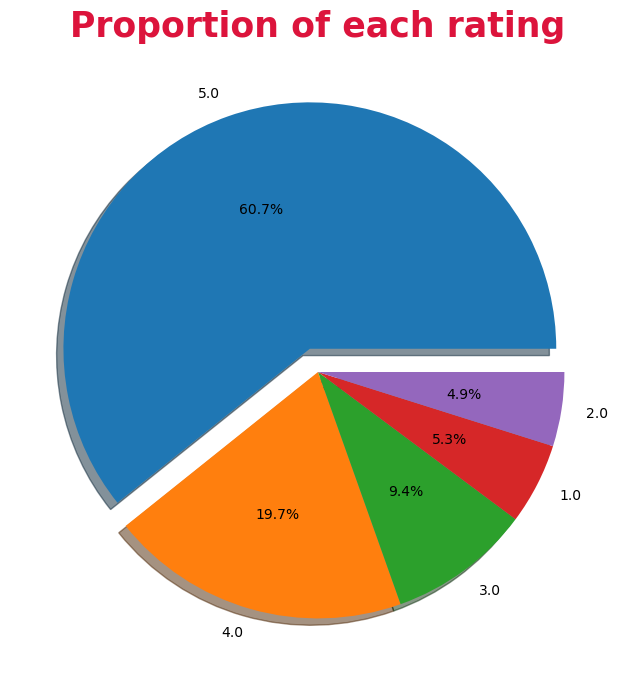

In [8]:
plt.figure(figsize=(15,8))
labels = df['rating'].value_counts().keys()
values = df['rating'].value_counts().values
explode = (0.1,0,0,0,0)
plt.pie(values,labels=labels,explode=explode,shadow=True,autopct='%1.1f%%')
plt.title('Proportion of each rating',fontweight='bold',fontsize=25,pad=20,color='crimson')
plt.show()

In [9]:
def clean_text(text):
    nopunc = [w for w in text if w not in string.punctuation]
    nopunc = ''.join(nopunc)
    return  ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])

In [10]:
df['text_'][0], clean_text(df['text_'][0])

('Love this!  Well made, sturdy, and very comfortable.  I love it!Very pretty',
 'Love Well made sturdy comfortable love itVery pretty')

In [11]:
df['text_'].head().apply(clean_text)

0    Love Well made sturdy comfortable love itVery ...
1    love great upgrade original Ive mine couple years
2              pillow saved back love look feel pillow
3          Missing information use great product price
4                 nice set Good quality set two months
Name: text_, dtype: object

In [12]:
df.shape

(40432, 4)

In [13]:
df['text_'] = df['text_'].astype(str)

In [14]:
def preprocess(text):
    return ' '.join([word for word in word_tokenize(text) if word not in stopwords.words('english') and not word.isdigit() and word not in string.punctuation])

In [15]:
preprocess(df['text_'][4])

'Very nice set Good quality We set two months'

In [16]:
df['text_'][:10000] = df['text_'][:10000].apply(preprocess)

In [17]:
df['text_'][10001:20000] = df['text_'][10001:20000].apply(preprocess)

In [18]:
df['text_'][20001:30000] = df['text_'][20001:30000].apply(preprocess)

In [19]:
df['text_'][30001:40000] = df['text_'][30001:40000].apply(preprocess)

In [20]:
df['text_'][40001:40432] = df['text_'][40001:40432].apply(preprocess)

In [21]:
df['text_'] = df['text_'].str.lower()

In [22]:
stemmer = PorterStemmer()
def stem_words(text):
    return ' '.join([stemmer.stem(word) for word in text.split()])
df['text_'] = df['text_'].apply(lambda x: stem_words(x))

In [23]:
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
df["text_"] = df["text_"].apply(lambda text: lemmatize_words(text))

In [24]:
df['text_'].head()

0    love well made sturdi comfort i love veri pretti
1      love great upgrad origin i 've mine coupl year
2        thi pillow save back i love look feel pillow
3               miss inform use great product price i
4         veri nice set good qualiti we set two month
Name: text_, dtype: object

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings, string
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [26]:
df = pd.read_csv(r'C:\Preprocessed Fake Reviews Detection Dataset.csv')
df.head()

,Unnamed: 0,category,rating,label,text_
0,0,Home_and_Kitchen_5,5.0,CG,love well made sturdi comfort i love veri pretti
1,1,Home_and_Kitchen_5,5.0,CG,love great upgrad origin i 've mine coupl year
2,2,Home_and_Kitchen_5,5.0,CG,thi pillow save back i love look feel pillow
3,3,Home_and_Kitchen_5,1.0,CG,miss inform use great product price i
4,4,Home_and_Kitchen_5,5.0,CG,veri nice set good qualiti we set two month


In [27]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [28]:
df.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,love well made sturdi comfort i love veri pretti
1,Home_and_Kitchen_5,5.0,CG,love great upgrad origin i 've mine coupl year
2,Home_and_Kitchen_5,5.0,CG,thi pillow save back i love look feel pillow
3,Home_and_Kitchen_5,1.0,CG,miss inform use great product price i
4,Home_and_Kitchen_5,5.0,CG,veri nice set good qualiti we set two month


In [29]:
df.dropna(inplace=True)

In [30]:
df['length'] = df['text_'].apply(len)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40431 entries, 0 to 40431
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  40431 non-null  object 
 1   rating    40431 non-null  float64
 2   label     40431 non-null  object 
 3   text_     40431 non-null  object 
 4   length    40431 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 1.9+ MB


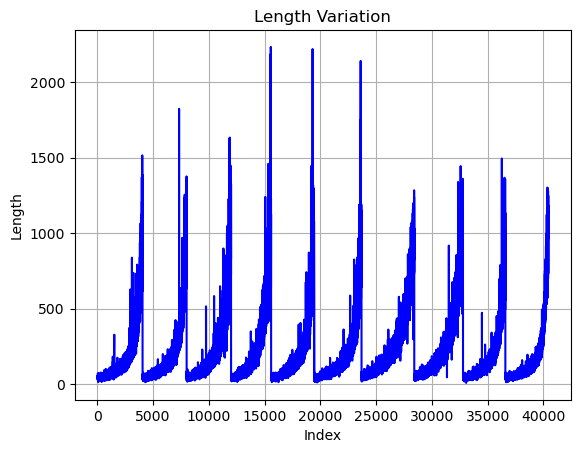

In [32]:
import matplotlib.pyplot as plt

# Plotting a line plot for the 'length' column of the DataFrame
plt.plot(df['length'], color='blue')
plt.xlabel('Index')
plt.ylabel('Length')
plt.title('Length Variation')
plt.grid(True)
plt.show()


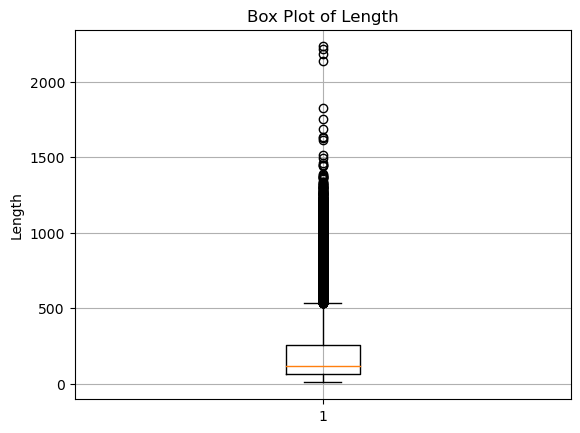

In [33]:
import matplotlib.pyplot as plt

# Creating a box plot for the 'length' column of the DataFrame
plt.boxplot(df['length'])
plt.ylabel('Length')
plt.title('Box Plot of Length')
plt.grid(True)
plt.show()


In [34]:
df.groupby('label').describe()

rating                                                length  \
         count      mean       std  min  25%  50%  75%  max    count   
label                                                                  
CG     20215.0  4.259906  1.141092  1.0  4.0  5.0  5.0  5.0  20215.0   
OR     20216.0  4.253265  1.147652  1.0  4.0  5.0  5.0  5.0  20216.0   

                                                                 
             mean         std   min   25%    50%    75%     max  
label                                                            
CG     173.639030  173.955252  13.0  57.0   99.0  217.0  1300.0  
OR     237.893599  252.920950   8.0  74.0  134.0  296.0  2232.0

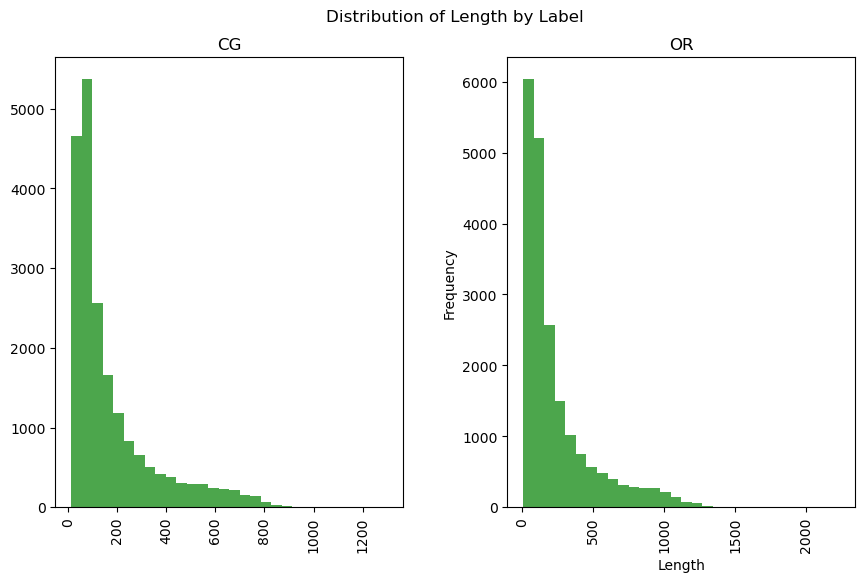

In [35]:
import matplotlib.pyplot as plt

# Creating histograms for the 'length' column grouped by 'label' with customizations
df.hist(column='length', by='label', bins=30, color='green', figsize=(10, 6), grid=False, alpha=0.7)
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.suptitle('Distribution of Length by Label')
plt.show()


In [36]:
df[df['label']=='OR'][['text_','length']].sort_values(by='length',ascending=False).head().iloc[0].text_

"weak on current scienc after see twice i agre much posit five star review out respect read review i 'll repeat everyth i like present i found goofi over ear hairdo facial hair arrang daniel vitali describ `` wild food expert '' distract ugh ditto david wolf extrem goofi wild hairdo on hand jon gabriel describ `` author weight loss expert '' nice groom good present hi stori person transform fellow pound whew becom jock normal weight inspir christian northrup preserv rank one america 's cutest doctor a realli nice look woman present dr. mercola jason vale kri carr alejandro junger fine it disappoint jami oliv popular uk give babi cow growth fluid pas unscientif popular idea milk none present anyth zilch say work doctor t. colin campbel milk bodi bad it good see present take stand sugar they agre evil sugar refin carbohydr with respect dr. northrup `` it 's fat make fat 's sugar '' statement pas muster commun expert recogn evil sugar not mutual exclus recogn proven danger fat particularl

In [37]:
df.length.describe()

count    40431.000000
mean       205.767109
std        219.422327
min          8.000000
25%         64.000000
50%        116.000000
75%        253.000000
max       2232.000000
Name: length, dtype: float64

In [38]:
def text_process(review):
    nopunc = [char for char in review if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [39]:
bow_transformer = CountVectorizer(analyzer=text_process)
bow_transformer

CountVectorizer(analyzer=<function text_process at 0x000001BA37D29670>)

In [40]:
bow_transformer.fit(df['text_'])
print("Total Vocabulary:",len(bow_transformer.vocabulary_))

Total Vocabulary: 34452


In [41]:
review4 = df['text_'][3]
review4

'miss inform use great product price i'

In [42]:
bow_msg4 = bow_transformer.transform([review4])
print(bow_msg4)
print(bow_msg4.shape)

  (0, 13599)	1
  (0, 15841)	1
  (0, 19849)	1
  (0, 23848)	1
  (0, 23978)	1
  (0, 32184)	1
(1, 34452)


In [43]:
bow_reviews = bow_transformer.transform(df['text_'])

In [44]:
print("Shape of Bag of Words Transformer for the entire reviews corpus:",bow_reviews.shape)
print("Amount of non zero values in the bag of words model:",bow_reviews.nnz)

Shape of Bag of Words Transformer for the entire reviews corpus: (40431, 34452)
Amount of non zero values in the bag of words model: 1013899


In [45]:
print("Sparsity:",np.round((bow_reviews.nnz/(bow_reviews.shape[0]*bow_reviews.shape[1]))*100,2))

Sparsity: 0.07


In [46]:
tfidf_transformer = TfidfTransformer().fit(bow_reviews)
tfidf_rev4 = tfidf_transformer.transform(bow_msg4)
print(bow_msg4)

  (0, 13599)	1
  (0, 15841)	1
  (0, 19849)	1
  (0, 23848)	1
  (0, 23978)	1
  (0, 32184)	1


In [47]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['mango']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['book']])

10.91422964906803
2.821684385176731


In [48]:
tfidf_reviews = tfidf_transformer.transform(bow_reviews)
print("Shape:",tfidf_reviews.shape)
print("No. of Dimensions:",tfidf_reviews.ndim)

Shape: (40431, 34452)
No. of Dimensions: 2


In [49]:
review_train, review_test, label_train, label_test = train_test_split(df['text_'],df['label'],test_size=0.35)

In [50]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])

# Naive Bayes Algorithm

In [51]:
pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000001BA37D29670>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [52]:
predictions = pipeline.predict(review_test)
predictions

array(['OR', 'OR', 'CG', ..., 'CG', 'CG', 'CG'], dtype='<U2')

In [53]:
print('Classification Report:',classification_report(label_test,predictions))
print('Confusion Matrix:',confusion_matrix(label_test,predictions))
print('Accuracy Score:',accuracy_score(label_test,predictions))

Classification Report:               precision    recall  f1-score   support

          CG       0.82      0.88      0.85      7106
          OR       0.87      0.80      0.83      7045

    accuracy                           0.84     14151
   macro avg       0.84      0.84      0.84     14151
weighted avg       0.84      0.84      0.84     14151

Confusion Matrix: [[6288  818]
 [1417 5628]]
Accuracy Score: 0.8420606317574729


In [54]:
# Calculate the accuracy score and print it
NB_accuracy = accuracy_score(label_test, predictions)
print('Model Prediction Accuracy: {:.2f}%'.format(NB_accuracy * 100))


Model Prediction Accuracy: 84.21%


In [55]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',RandomForestClassifier())
])

In [56]:
pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000001BA37D29670>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [57]:
rfc_pred = pipeline.predict(review_test)
rfc_pred

array(['OR', 'OR', 'CG', ..., 'OR', 'CG', 'CG'], dtype=object)

In [58]:
print('Classification Report:',classification_report(label_test,rfc_pred))
print('Confusion Matrix:',confusion_matrix(label_test,rfc_pred))
print('Accuracy Score:',accuracy_score(label_test,rfc_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,rfc_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

          CG       0.80      0.89      0.84      7106
          OR       0.87      0.78      0.82      7045

    accuracy                           0.83     14151
   macro avg       0.84      0.83      0.83     14151
weighted avg       0.84      0.83      0.83     14151

Confusion Matrix: [[6306  800]
 [1545 5500]]
Accuracy Score: 0.8342873295173486
Model Prediction Accuracy: 83.43%


In [59]:
RF_accuracy = accuracy_score(label_test, rfc_pred)

# Print the accuracy score
print('Accuracy Score:', RF_accuracy)

Accuracy Score: 0.8342873295173486


In [60]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',DecisionTreeClassifier())
])

In [61]:
pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000001BA37D29670>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', DecisionTreeClassifier())])

In [62]:
dtree_pred = pipeline.predict(review_test)
dtree_pred

array(['OR', 'CG', 'CG', ..., 'OR', 'CG', 'OR'], dtype=object)

In [63]:
print('Classification Report:',classification_report(label_test,dtree_pred))
print('Confusion Matrix:',confusion_matrix(label_test,dtree_pred))
print('Accuracy Score:',accuracy_score(label_test,dtree_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,dtree_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

          CG       0.73      0.74      0.73      7106
          OR       0.73      0.72      0.72      7045

    accuracy                           0.73     14151
   macro avg       0.73      0.73      0.73     14151
weighted avg       0.73      0.73      0.73     14151

Confusion Matrix: [[5272 1834]
 [1998 5047]]
Accuracy Score: 0.7292064165076673
Model Prediction Accuracy: 72.92%


In [64]:
DT_accuracy = accuracy_score(label_test, dtree_pred)

# Print the accuracy score
print('Accuracy Score:', DT_accuracy)

Accuracy Score: 0.7292064165076673


In [65]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',SVC())
])

In [66]:
pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000001BA37D29670>)),
                ('tfidf', TfidfTransformer()), ('classifier', SVC())])

In [67]:
svc_pred = pipeline.predict(review_test)
svc_pred

array(['OR', 'OR', 'CG', ..., 'OR', 'CG', 'CG'], dtype=object)

In [68]:
print('Classification Report:',classification_report(label_test,svc_pred))
print('Confusion Matrix:',confusion_matrix(label_test,svc_pred))
print('Accuracy Score:',accuracy_score(label_test,svc_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,svc_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

          CG       0.89      0.86      0.87      7106
          OR       0.87      0.89      0.88      7045

    accuracy                           0.88     14151
   macro avg       0.88      0.88      0.88     14151
weighted avg       0.88      0.88      0.88     14151

Confusion Matrix: [[6144  962]
 [ 796 6249]]
Accuracy Score: 0.8757684969260123
Model Prediction Accuracy: 87.58%


In [69]:
SVC_accuracy = accuracy_score(label_test, svc_pred)

# Print the accuracy score
print('Accuracy Score:', SVC_accuracy)

Accuracy Score: 0.8757684969260123


In [70]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',LogisticRegression())
])

In [71]:
pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000001BA37D29670>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', LogisticRegression())])

In [72]:
lr_pred = pipeline.predict(review_test)
lr_pred

array(['OR', 'OR', 'CG', ..., 'OR', 'CG', 'CG'], dtype=object)

In [73]:
print('Classification Report:',classification_report(label_test,lr_pred))
print('Confusion Matrix:',confusion_matrix(label_test,lr_pred))
print('Accuracy Score:',accuracy_score(label_test,lr_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,lr_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

          CG       0.86      0.85      0.86      7106
          OR       0.85      0.86      0.86      7045

    accuracy                           0.86     14151
   macro avg       0.86      0.86      0.86     14151
weighted avg       0.86      0.86      0.86     14151

Confusion Matrix: [[6044 1062]
 [ 954 6091]]
Accuracy Score: 0.8575365698537206
Model Prediction Accuracy: 85.75%


In [74]:
LR_accuracy = accuracy_score(label_test, lr_pred)

# Print the accuracy score
print('Accuracy Score:', LR_accuracy)

Accuracy Score: 0.8575365698537206


In [75]:
print('Performance of various ML models:')
print('Logistic Regression Prediction Accuracy:',str(np.round(accuracy_score(label_test,lr_pred)*100,2)) + '%')
print('Decision Tree Classifier Prediction Accuracy:',str(np.round(accuracy_score(label_test,dtree_pred)*100,2)) + '%')
print('Random Forests Classifier Prediction Accuracy:',str(np.round(accuracy_score(label_test,rfc_pred)*100,2)) + '%')
print('Support Vector Machines Prediction Accuracy:',str(np.round(accuracy_score(label_test,svc_pred)*100,2)) + '%')
print('Multinomial Naive Bayes Prediction Accuracy:',str(np.round(accuracy_score(label_test,predictions)*100,2)) + '%')

Performance of various ML models:
Logistic Regression Prediction Accuracy: 85.75%
Decision Tree Classifier Prediction Accuracy: 72.92%
Random Forests Classifier Prediction Accuracy: 83.43%
Support Vector Machines Prediction Accuracy: 87.58%
Multinomial Naive Bayes Prediction Accuracy: 84.21%


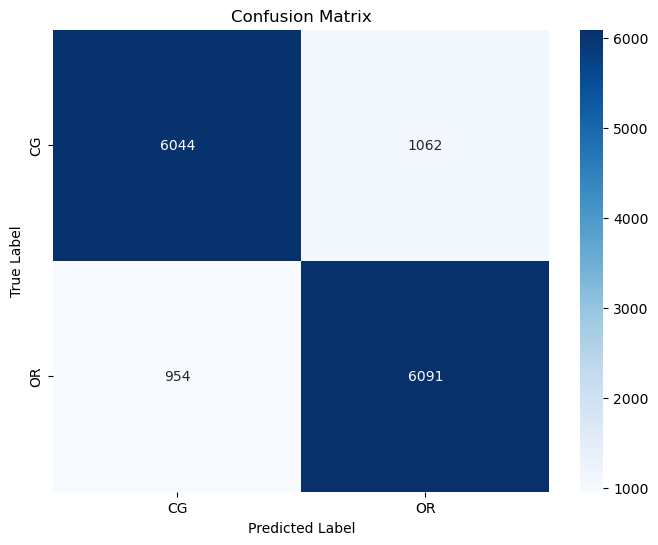

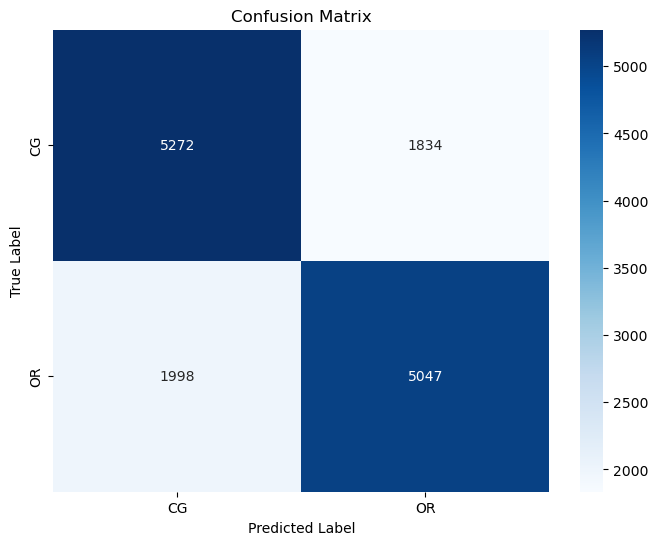

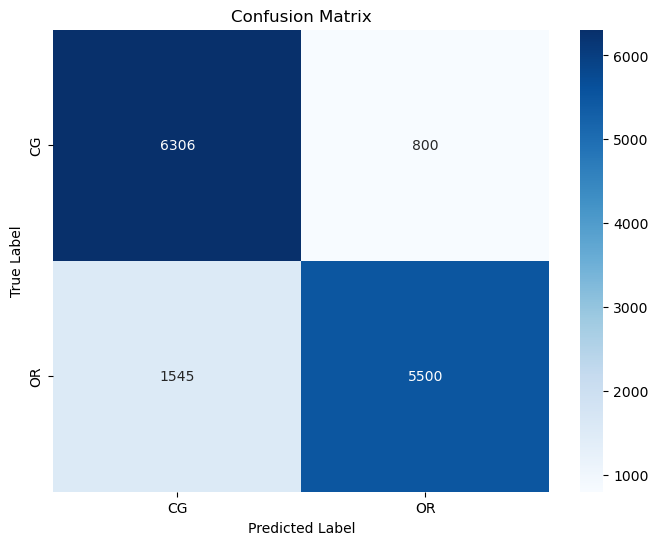

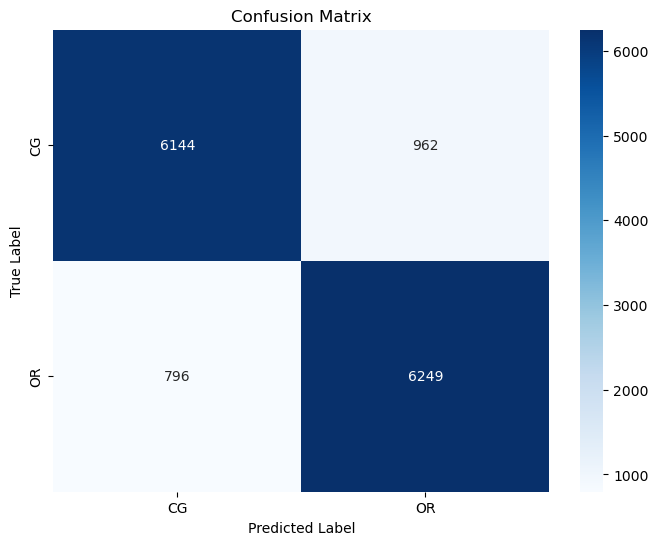

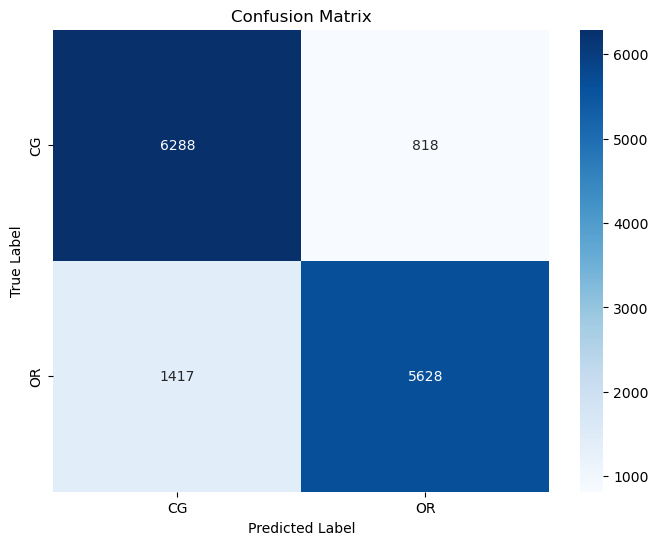

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Function to plot confusion matrix
def plot_confusion_matrix(cm, labels):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

# Confusion matrix for Logistic Regression
lr_cm = confusion_matrix(label_test, lr_pred)
plot_confusion_matrix(lr_cm, ['CG', 'OR'])

# Confusion matrix for Decision Tree Classifier
dtree_cm = confusion_matrix(label_test, dtree_pred)
plot_confusion_matrix(dtree_cm, ['CG', 'OR'])

# Confusion matrix for Random Forest Classifier
rfc_cm = confusion_matrix(label_test, rfc_pred)
plot_confusion_matrix(rfc_cm, ['CG', 'OR'])

# Confusion matrix for Support Vector Machines (SVM)
svc_cm = confusion_matrix(label_test, svc_pred)
plot_confusion_matrix(svc_cm, ['CG', 'OR'])

# Confusion matrix for Multinomial Naive Bayes
nb_cm = confusion_matrix(label_test, predictions)
plot_confusion_matrix(nb_cm, ['CG', 'OR'])


In [80]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, SpatialDropout1D

# Load the data
data = pd.read_csv(r'C:\fake reviews dataset.csv')

# Preprocess the text data
data['text_'] = data['text_'].apply(lambda x: x.lower() if isinstance(x, str) else '')

# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['text_'])
sequences = tokenizer.texts_to_sequences(data['text_'])

# Pad sequences to ensure uniform length
MAX_SEQUENCE_LENGTH = 100  # Adjust as needed
X_pad = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

# Convert labels to numerical format (CG: 0, OR: 1)
label_dict = {'CG': 0, 'OR': 1}
data['label'] = data['label'].map(label_dict)
y = data['label'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, random_state=42)

# Define constants
EMBEDDING_DIM = 100  # Dimension of word embeddings
VOCAB_SIZE = len(tokenizer.word_index) + 1  # Vocabulary size

# Define the LSTM model
model = Sequential()
model.add(Embedding(VOCAB_SIZE, EMBEDDING_DIM))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))  # Binary classification, so using sigmoid activation

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)


Epoch 1/5
506/506 ━━━━━━━━━━━━━━━━━━━━ 153s 287ms/step - accuracy: 0.8198 - loss: 0.3932 - val_accuracy: 0.9343 - val_loss: 0.1724
Epoch 2/5
506/506 ━━━━━━━━━━━━━━━━━━━━ 148s 292ms/step - accuracy: 0.9435 - loss: 0.1532 - val_accuracy: 0.9420 - val_loss: 0.1586
Epoch 3/5
506/506 ━━━━━━━━━━━━━━━━━━━━ 150s 297ms/step - accuracy: 0.9583 - loss: 0.1185 - val_accuracy: 0.9431 - val_loss: 0.1563
Epoch 4/5
506/506 ━━━━━━━━━━━━━━━━━━━━ 151s 298ms/step - accuracy: 0.9654 - loss: 0.0974 - val_accuracy: 0.9439 - val_loss: 0.1537
Epoch 5/5
506/506 ━━━━━━━━━━━━━━━━━━━━ 151s 299ms/step - accuracy: 0.9721 - loss: 0.0784 - val_accuracy: 0.9473 - val_loss: 0.1491
253/253 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - accuracy: 0.9488 - loss: 0.1493
Test Accuracy: 0.9473228454589844


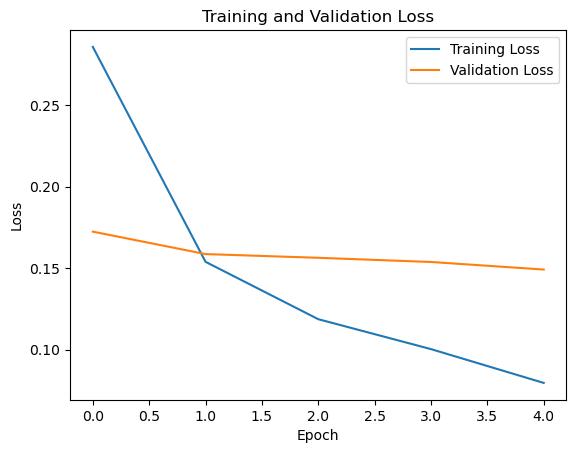

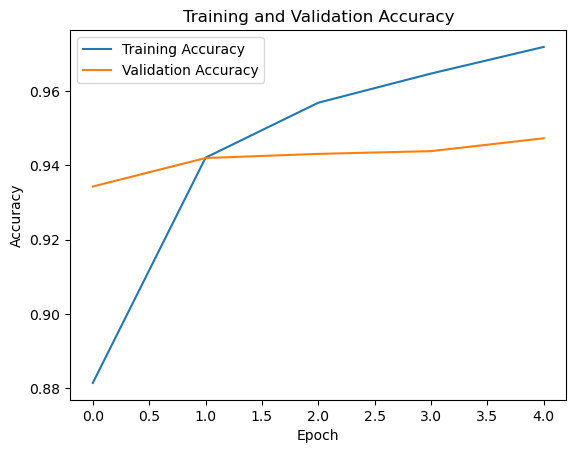

In [81]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [82]:
from sklearn.model_selection import StratifiedKFold
from keras.layers import Conv1D, MaxPooling1D, Flatten
# Define the number of folds for cross-validation
num_folds = 5

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Define lists to store validation results
val_losses = []
val_accuracies = []

# Iterate over each fold
for fold, (train_indices, val_indices) in enumerate(skf.split(X_pad, y)):
    print(f"Fold {fold + 1}/{num_folds}")
    X_train, X_val = X_pad[train_indices], X_pad[val_indices]
    y_train, y_val = y[train_indices], y[val_indices]

    # Define and compile the model
    model = Sequential()
    model.add(Embedding(VOCAB_SIZE, EMBEDDING_DIM))
    model.add(Conv1D(64, 5, activation='relu'))  # 64 filters of size 5 with ReLU activation
    model.add(MaxPooling1D(pool_size=4))
    model.add(SpatialDropout1D(0.2))
    model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_val, y_val))

    # Evaluate the model on validation data
    loss, accuracy = model.evaluate(X_val, y_val)
    val_losses.append(loss)
    val_accuracies.append(accuracy)

# Calculate and print average validation loss and accuracy across folds
avg_val_loss = np.mean(val_losses)
avg_val_accuracy = np.mean(val_accuracies)
print(f"Average Validation Loss: {avg_val_loss}")
print(f"Average Validation Accuracy: {avg_val_accuracy}")

Fold 1/5
Epoch 1/5
506/506 ━━━━━━━━━━━━━━━━━━━━ 78s 137ms/step - accuracy: 0.8010 - loss: 0.3867 - val_accuracy: 0.9264 - val_loss: 0.1841
Epoch 2/5
506/506 ━━━━━━━━━━━━━━━━━━━━ 68s 134ms/step - accuracy: 0.9492 - loss: 0.1325 - val_accuracy: 0.9337 - val_loss: 0.1743
Epoch 3/5
506/506 ━━━━━━━━━━━━━━━━━━━━ 68s 134ms/step - accuracy: 0.9719 - loss: 0.0727 - val_accuracy: 0.9419 - val_loss: 0.1736
Epoch 4/5
506/506 ━━━━━━━━━━━━━━━━━━━━ 69s 136ms/step - accuracy: 0.9852 - loss: 0.0425 - val_accuracy: 0.9418 - val_loss: 0.1892
Epoch 5/5
506/506 ━━━━━━━━━━━━━━━━━━━━ 69s 136ms/step - accuracy: 0.9889 - loss: 0.0310 - val_accuracy: 0.9410 - val_loss: 0.2013
253/253 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.9378 - loss: 0.1991
Fold 2/5
Epoch 1/5
506/506 ━━━━━━━━━━━━━━━━━━━━ 82s 148ms/step - accuracy: 0.8065 - loss: 0.3881 - val_accuracy: 0.9326 - val_loss: 0.1711
Epoch 2/5
506/506 ━━━━━━━━━━━━━━━━━━━━ 69s 137ms/step - accuracy: 0.9521 - loss: 0.1258 - val_accuracy: 0.9346 - val_loss: 0.1

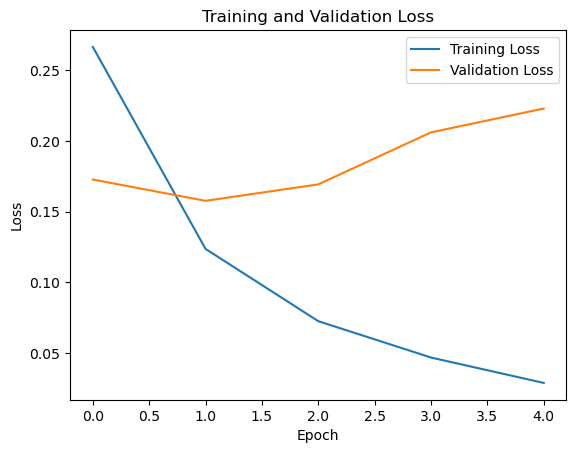

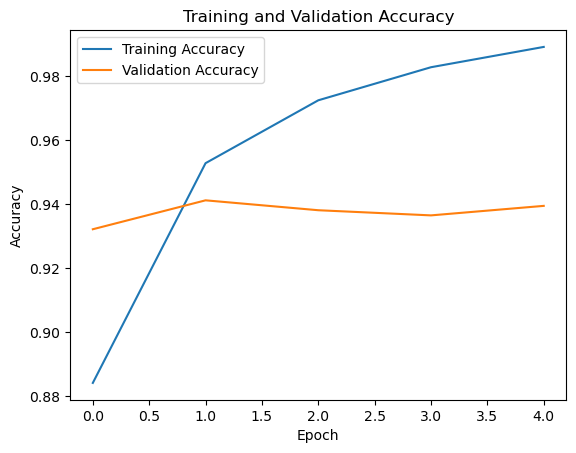

In [83]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [84]:
# Assuming X_test contains the new data for prediction

# Make predictions on the test data
predictions = model.predict(X_test)

# Convert the probabilities to class labels (0 or 1)
predicted_labels = (predictions > 0.5).astype(int)

# Print the predicted labels
print("Predicted Labels:", predicted_labels)

253/253 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step
Predicted Labels: [[0]
 [0]
 [1]
 ...
 [0]
 [1]
 [1]]


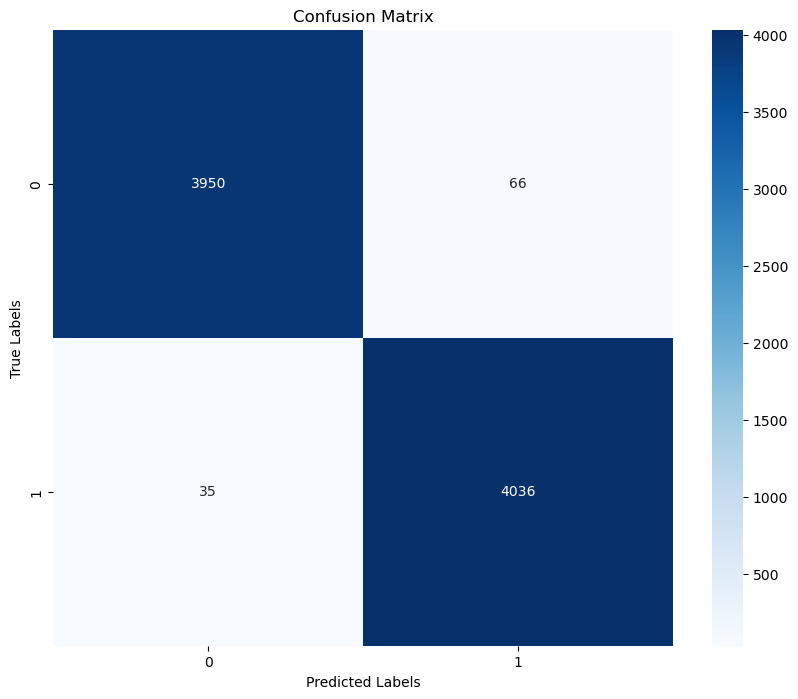

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, predicted_labels)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
